# Predicting the prices of Avacados

The dataset represents weekly 2018 retail scan data for National retail volume
 (units) and price. Retail scan data comes directly from retailers’ cash registers
 based on actual retail sales of Hass avocados. The Product Lookup codes
 (PLU’s) in the table are only for Hass avocados. Other varieties of avocados
 (e.g. greenskins) are not included in this table.
 Some relevant columns in the dataset:
 In [75]:
 Date - The date of the observation
 AveragePrice - the average price of a single avocado
 type - conventional or organic
 year - the year
 Region - the city or region of the observation
 Total Volume - Total number of avocados sold
 4046 - Total number of avocados with PLU 4046 sold
 4225 - Total number of avocados with PLU 4225 sold
 4770 - Total number of avocados with PLU 4770 sold

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv('avocado.csv')

In [10]:
df.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [12]:
#Check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


There are three categorical values and no missing values in the data

In [13]:
df.isnull()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18245,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18246,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18247,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

 Data set has  not any missing values

In [16]:
df.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


<Axes: xlabel='AveragePrice', ylabel='Density'>

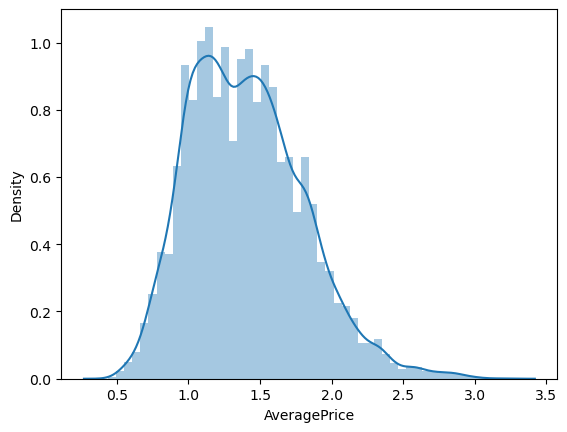

In [18]:
#To display the distplot
sns.distplot(df['AveragePrice']) #price is dependent variable

<Axes: xlabel='year', ylabel='count'>

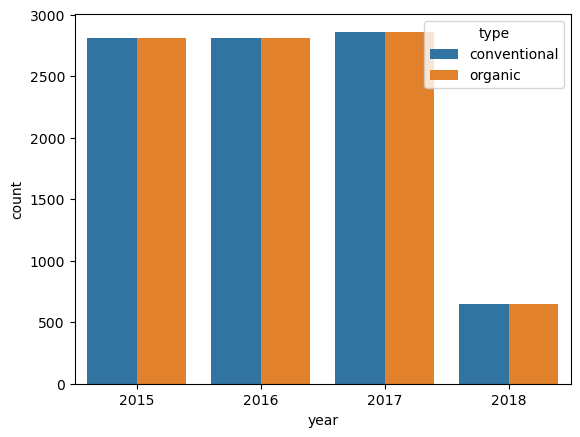

In [20]:
sns.countplot(x='year',data=df,hue='type')

There are almost equal numbers of conventional and organic avacados. Though, there is
 very less observations in the year 2018.

In [21]:
df.year.value_counts()

year
2017    5722
2016    5616
2015    5615
2018    1296
Name: count, dtype: int64

In [22]:
df.region.value_counts()

region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago              

<Axes: xlabel='AveragePrice', ylabel='type'>

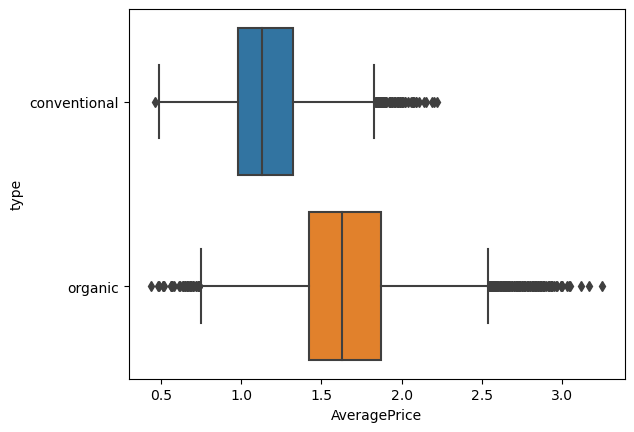

In [23]:
sns.boxplot(x='AveragePrice',y='type',data=df)

 organice avacados are more expensive price range is 1.5-2.0 where as conventional
 Avacados are 1.0-1.5

<Axes: xlabel='year', ylabel='AveragePrice'>

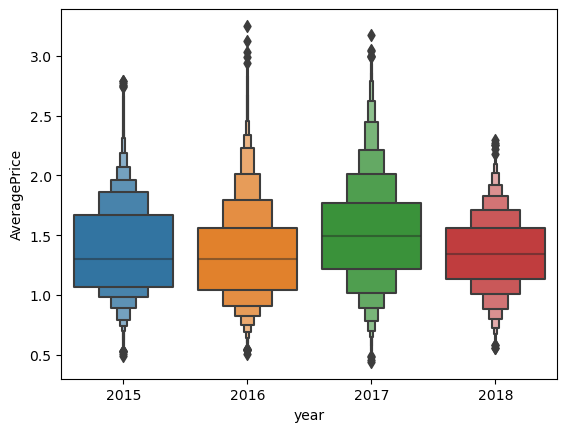

In [25]:
df.year=df.year.apply(str)
sns.boxenplot(x='year',y='AveragePrice',data=df)

# Dealing with Categorical features

Date,type,region

In [26]:
df['type']= df['type'].map({'conventional':0,'organic':1})
# Extracting month from date column.
df.Date = df.Date.apply(pd.to_datetime)
df['Month']=df['Date'].apply(lambda x:x.month)
df.drop('Date',axis=1,inplace=True)
df.Month = df.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUGUST',9:'SEPTEMBER',10:'OCTOMBER',11:'NOVEMBER',12:'DECEMBER'})

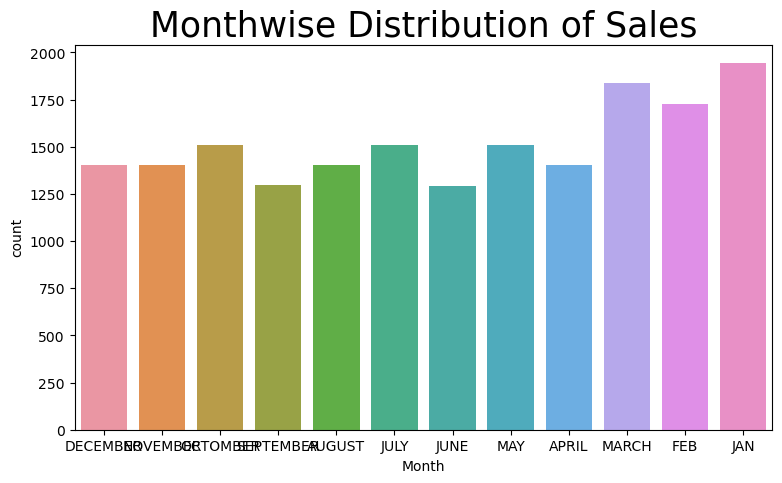

In [27]:
plt.figure(figsize=(9,5))
sns.countplot(x='Month',data=df)
plt.title('Monthwise Distribution of Sales',fontdict={'fontsize':25});

In [29]:
df.head(3)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,DECEMBER
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,DECEMBER
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,DECEMBER


In [40]:
# Creating dummy variables
dummies = pd.get_dummies(df[['year','region','Month']],drop_first=True)
df_dummies = pd.concat([df[['Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 'XLarge Bags', 'type']],dummies],axis=1)
target = df['AveragePrice']
# Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies,target,test_size=0.3, random_state=42)
# Standardizing the data
cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags', 'type']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train[cols_to_std])
X_train[cols_to_std] = scaler.transform(X_train[cols_to_std])
X_test[cols_to_std] = scaler.transform(X_test[cols_to_std])

In [41]:
#importing ML models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
#from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [42]:
#to save time all models can be applied once using for loop
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    #'XGBoost' : XGBRegressor()
 }
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)
                         ]

In [43]:
print(results)

                           MAE    MSE  R2-score
Linear Regression        0.183  0.058     0.638
Decision Tree            0.132  0.039     0.755
Random Forest            0.095  0.018     0.886
Support Vector Machines  0.120  0.030     0.816
K-nearest Neighbors      0.099  0.024     0.854
